# Geopandas
Geopandas is a Python library for geospatial data.

Begin my importing using the standard abberviation:

In [3]:
# import geopandas
import geopandas as gpd

# additional libraries
    #.pyplot means we're only importing part of the library
import matplotlib.pyplot as plt

## About the Data
Looking at data on invasive wild pig sightings (_Sus scrofa_). This data is from the Global Biodiversity Information Facility (GBIF).

We'll start by reading in this data using the `gpd.read_file()` function.

__Example:__ Read in data
* all data files are within the same folder, they have the same name but different document types
* copy the name from the file directory if it's easier
* the .shp file type is the shape file

In [5]:
# read in data
pigs = gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')

# check df
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


## `Geoseries` and `GeoDataFrame`

The core data structure of GeoPandas is `geopandas.GeoDataFrame`. This is like a `pandas.DataFrame` with a dedicated geometry column. The __geometry column__ holds the geometries (point, polygon, etc.) of each spatial feature. For the geometry column, the data type is `geopandas.GeoSeries`.

Other non-geometry columns in the `geopandas.GeoDataFrame` have object-type `Series`

__Example__: Check the data types of the following
* type of pigs df
* type of geom columns
* type of gbifID column

In [6]:
# a
print(type(pigs))

#b
print(type(pigs.geometry))

#c 
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [7]:
# check data type of columns
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

## Geometric Information
Two other important attributes of a `gpd.GeoDataFrame` are the coordinate reference system (CRS) and its extent. Think of CRS as the instructions to locate each feature on the surface of the Earth.

### CRS
We can access the CRS of the geo-dataframe using the `crs` attribute:

In [9]:
# access CRS
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Extent
The __extent__ of the geo-dataframe is the bounding box covering all the features in our geo-dataframe. This is formed by finding the points that are furthest west, east, south and north.

We can access information to create the extent of a geo-dataframe using the `total_bounds` attribute:

In [10]:
#this will print 4 points that denote the corners of our box
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Data Wrangling
Geopandas is built on top of `pandas` so many of the functions we've learned for wrangling `pandas` data still applies here.

__Example:__ We only want to use recent data of wild pig observations. View and filter to desired dates:

In [13]:
# view what dates we have
pigs.year.value_counts().sort_index()

In [22]:
# apply data selection
pigs_recent = pigs[pigs.year>=2020]

# compare length of original and new df
print(len(pigs))
print(len(pigs_recent))

1046
606


### Plotting 
Similarly to a `pd.DataFrame`, a `gpd.GeoDataFrame` has a plot() method that we can call directly to create a quick view of our data. The geospatial information of the gpd.GeoDataFrame will be used to create the axes of the plot.

__Example:__ This is a quick look at our recent pigs data:

<AxesSubplot:>

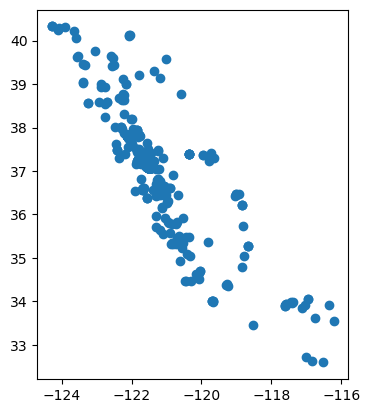

In [23]:
# when you have geospatial data, it's used as the plotting default
pigs_recent.plot()

## `matploblib` - `fig` and `ax` plots

Going forward, we will often want to make more complex visualizations where we add different layers to a graph and customize it. To do this we will use the `matplotlib` Python library for creating visualizations. We can interact with matplotlib via its `pyplot` interface, which we imported at the top of the notebook as:

```Python
import matplotlib.pyplot as plt
```

### Creating a Blank Figure
`Matplotlib` graphs the data in a __figure__ which can have one or more __axes__. The __axes__ is _only_ the area specified by the x-y axis and what's plotted in it. This can be visualized using a blank figure.

__Example:__ Initialize a blank figure
* Initialize a blank figure and axes by calling the `pyplot` function, `subplots()`
    * Notice that `plt.subplots()` is a function that returns two objects (has two outputs)
    * specify `fig, ax` to store both these variable
* Show the graph using `plt.show()`

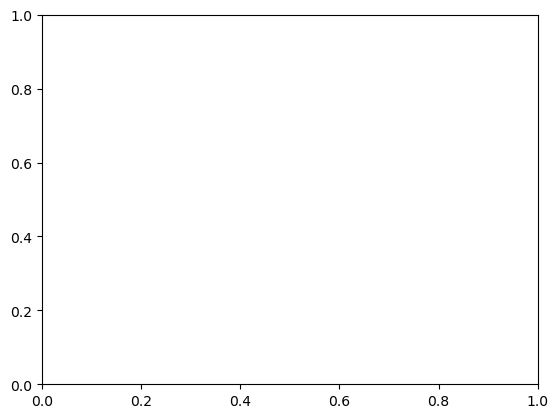

In [25]:
# create blank fiure
fig, ax = plt.subplots()

# display figure
plt.show()

### Adding Plot Layers
When using `matplotlib` it can be helpful to think of your figure as a blank canvas that you must add layers to. The general syntax to plot a `df` onto an axis is:

```Python
# create new figure and axis
fig, ax = plt.subplots()

# plot df on the ax axis
df.plot(ax=ax, 
        ...)   # other arguments for plot function

# display figure
plt.show()
```

__Example:__ The first layer we want to add to our axis is the `pigs_recent` point data

<function matplotlib.pyplot.show(close=None, block=None)>

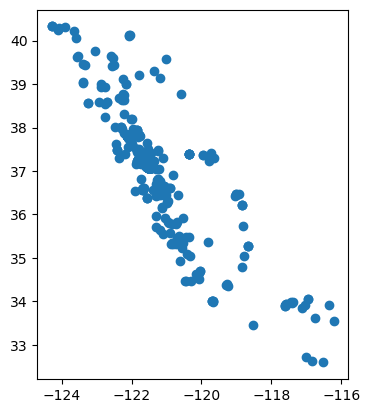

In [26]:
# create a new figure and axis
fig, ax = plt.subplots()

# add pig points plot to our figures axis
pigs_recent.plot(ax=ax)

# display figure
plt.show

### Customizations
`Matplotlib` allows for many customizations. Some can be done dirrectly within the `plot()` function, as we did with `pandas`. Other customizations are done by updating attributes from the axis. 

Some basic customizations of our pigs df:

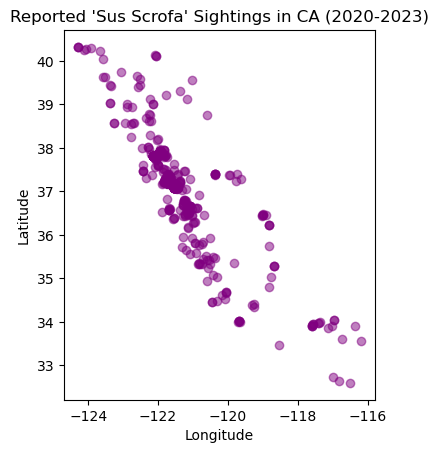

In [28]:
# initialize empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customaziation happens as arguments in plot()
pigs_recent.plot(ax=ax,
                alpha = 0.5,
                color = "purple")

#update axis
#customization separate from the data plotting
ax.set_title("Reported 'Sus Scrofa' Sightings in CA (2020-2023)")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()

## Exercise - CA Boundaries
1. Open CA boundary shapefile, store as `ca_boundary`, and view how many features it has
    * `geom_type` will show what kind of vector data is stored in each feature of the geom column
2. Add it to the pig sightings graph, so CA boundary appears behind the points

In [42]:
# import shapefile
ca_boundary = gpd.read_file('data/ca-boundary/ca-boundary.shp')

# view head 
ca_boundary.head()

# check the attribute
print(ca_boundary.geom_type)

# if you check pigs, you'll see they're all points
print(pigs_recent.geom_type)

0    MultiPolygon
dtype: object
61     Point
62     Point
63     Point
64     Point
65     Point
       ...  
727    Point
728    Point
729    Point
730    Point
733    Point
Length: 606, dtype: object


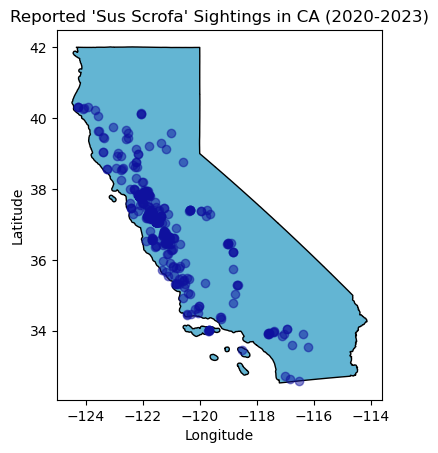

In [47]:
# initialize empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customaziation happens as arguments in plot()
ca_boundary.plot(ax=ax,
                color = '#63B5D3',
                edgecolor='black')
pigs_recent.plot(ax=ax,
                alpha = 0.5,
                color = "#0F119E")

#customization separate from the data plotting
ax.set_title("Reported 'Sus Scrofa' Sightings in CA (2020-2023)")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()